_"practice makes better"_

In [1]:
import warnings
warnings.filterwarnings("ignore")

import datetime as dt

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
df = (pd.read_csv('phone_data.csv'))
df.head(3)

,index,date,duration,item,network,network_type
0,0,15/10/14 06:58,34.429,data,data,data
1,1,15/10/14 06:58,13.000,call,Vodafone,mobile
2,2,15/10/14 14:46,23.000,call,Meteor,mobile


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 830 entries, 0 to 829
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         830 non-null    int64  
 1   date          830 non-null    object 
 2   duration      830 non-null    float64
 3   item          830 non-null    object 
 4   network       830 non-null    object 
 5   network_type  830 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 39.0+ KB


In [4]:
#a function to 'tidy' our data
def prep_df(df):
    return (df
            .assign(call_date = pd.to_datetime(df['date'].str.split(" ",expand=True)[0]),
                    call_time = df['date'].str.split(" ",expand=True)[1],
                    usage_minutes = df.duration / 60)
            .assign(network = df['network'].str.lower())
            .rename(columns={'index':'entry_number',
                             'item':'use_type'})
            .set_index('entry_number')
            .drop(columns='date')
        )

In [5]:
df = prep_df(df)
df

,duration,use_type,network,network_type,call_date,call_time,usage_minutes
entry_number,,,,,,,
0,34.429,data,data,data,2014-10-15,06:58,0.573817
1,13.000,call,vodafone,mobile,2014-10-15,06:58,0.216667
2,23.000,call,meteor,mobile,2014-10-15,14:46,0.383333
3,4.000,call,tesco,mobile,2014-10-15,14:48,0.066667
4,4.000,call,tesco,mobile,2014-10-15,17:27,0.066667
...,...,...,...,...,...,...,...
825,1.000,sms,world,world,2015-03-13,00:38,0.016667
826,1.000,sms,vodafone,mobile,2015-03-13,00:39,0.016667
827,34.429,data,data,data,2015-03-13,06:58,0.573817


In [6]:
df.dtypes

duration                float64
use_type                 object
network                  object
network_type             object
call_date        datetime64[ns]
call_time                object
usage_minutes           float64
dtype: object

In [7]:
(df
 .memory_usage(deep=True)
 #.sum()
)

Index             6640
duration          6640
use_type         50338
network          52282
network_type     52151
call_date         6640
call_time        51362
usage_minutes     6640
dtype: int64

In [8]:
df.isna().sum()

duration         0
use_type         0
network          0
network_type     0
call_date        0
call_time        0
usage_minutes    0
dtype: int64

<AxesSubplot:title={'center':'Total Call Durations for Networks'}, xlabel='network', ylabel='call duration'>

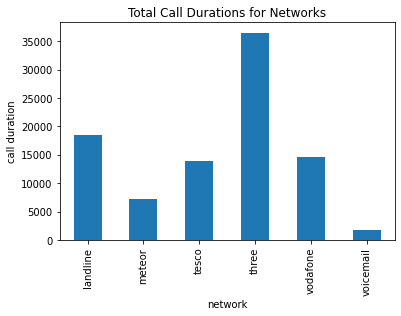

In [9]:
df.query('use_type == "call"').groupby('network')['duration'].sum().plot.bar(
    title='Total Call Durations for Networks',
    ylabel='call duration'
    )


In [10]:
df.network.value_counts()

vodafone     215
three        215
data         150
meteor        87
tesco         84
landline      42
voicemail     27
world          7
special        3
Name: network, dtype: int64

In [11]:
list(df.call_date.dt.year.unique())

[2014, 2015]

In [12]:
df.columns

Index(['duration', 'use_type', 'network', 'network_type', 'call_date',
       'call_time', 'usage_minutes'],
      dtype='object')

<AxesSubplot:title={'center':'Phone Use'}, xlabel='Period', ylabel='Time of Use'>

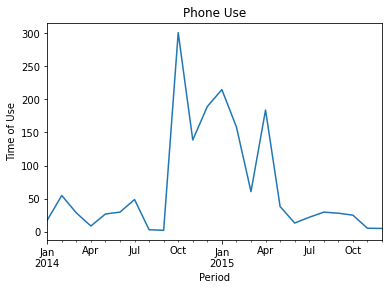

In [17]:
(df
.groupby(pd.Grouper(key='call_date', freq='1M'))['usage_minutes'].sum().plot(
    title='Phone Use',
    ylabel='Time of Use',
    xlabel='Period'
)

)


In [13]:
(df
 .pivot_table(df,
              'usage_minutes',
              index=df['network'],
              columns=df['call_date'].dt.month_name(),
              aggfunc='sum',
              fill_value=0)
# .style.format()
 #.set_caption('Monthly Call Durations For Each Newtork')
 #.highlight_min(color='red')
 #.highlight_max(color='green')
)

TypeError: DataFrame.pivot_table() got multiple values for argument 'index'